In [49]:
# importing libraries

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.text import Text
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [50]:
# importing dataset

df = pd.read_csv("C:/ads/DataGlacier/archive (1)/train_E6oV3lV.csv")
df.tail()
df_test=pd.read_csv("C:/ads/DataGlacier/archive (1)/test_tweets_anuFYb8.csv")

In [51]:
# Data 
df_test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [52]:
# total number of observations and features
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [53]:
# features that exists in this data
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [54]:
# type of data in the dataset
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [55]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [56]:
# size of the data
df.size

95886

In [57]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [58]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [59]:
# checking the missing values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [60]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


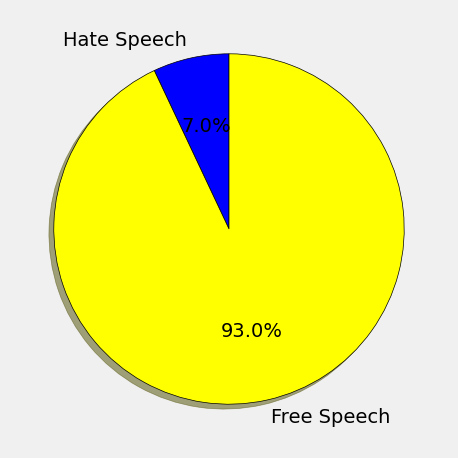

In [61]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]
plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['blue', 'yellow'])
plt.tight_layout()
plt.show()

In [62]:
# Data Preprocessing

In [63]:
# Text Cleaning: Lower Case
def lower_case(text):
    return text.lower()
df['tweet'] = df['tweet'].apply(lower_case)
df_test['tweet']= df_test['tweet'].apply(lower_case)

In [64]:
# Text Cleaning: Removing Punctuation
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))
df['tweet'] = df['tweet'].apply(remove_punct)
df_test['tweet']= df_test['tweet'].apply(remove_punct)

In [65]:
# Text Cleaning: Removing URLs
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))
df['tweet'] = df['tweet'].apply(remove_punct)
df_test['tweet']= df_test['tweet'].apply(remove_punct)

In [66]:
# Text Cleaning: Removing Tags
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext
df['tweet'] = df['tweet'].apply(remove_tag)
df_test['tweet']= df_test['tweet'].apply(remove_tag)

In [67]:
# Text Cleaning: Removing Special Characters
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())
df['tweet'] = df['tweet'].apply(remove_special)
df_test['tweet']= df_test['tweet'].apply(remove_special)

In [68]:
from sklearn.utils import resample

# Separate majority and minority classes
free_speech = df[df['label'] == 0]
hate_speech = df[df['label'] == 1]

# Oversample minority class
hate_speech_oversampled = resample(hate_speech,
                                   replace=True, # sample with replacement
                                   n_samples=len(free_speech), # match number of majority class
                                   random_state=42) # reproducible results

# Combine majority class with oversampled minority class
balanced_data = pd.concat([free_speech, hate_speech_oversampled])

# Display new class counts
print(balanced_data['label'].value_counts())


label
0    29720
1    29720
Name: count, dtype: int64


In [69]:
balanced_data


,id,label,tweet
0,1,0,user when a father is dysfunctional and is so ...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in
4,5,0,factsguide society now motivation
...,...,...,...
24150,24151,1,msnbc cnn amjoy joe biden i want to thank trum...
11115,11116,1,user indianapolis colts black cheerleader hugs...
3417,3418,1,user you might be a libtard if libtard sjw lib...
12300,12301,1,black trump suppoer smacks down cnn repoer for...


In [101]:
hate_speech = balanced_data[balanced_data['label'] == 1].shape[0]
free_speech = balanced_data[balanced_data['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 29720
Free Speech = 29720


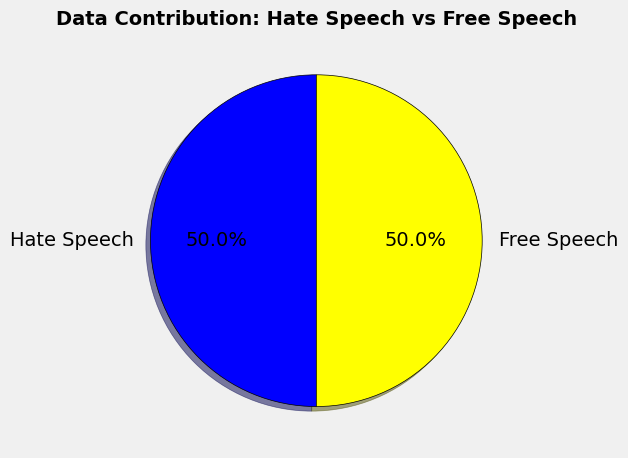

In [104]:
speech = [hate_speech, free_speech]  # Counts of hate speech and free speech
label = ["Hate Speech", "Free Speech"]

# Create the pie chart
plt.pie(speech, labels=label, shadow=True, wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow'])

# Add a title to the pie chart to represent data contribution
plt.title('Data Contribution: Hate Speech vs Free Speech', fontweight='bold', fontsize=14)



# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [70]:
# tokenizing
from nltk.tokenize import sent_tokenize, word_tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
balanced_data['tweet'] = balanced_data['tweet'].apply(tokenize)
df_test['tweet']= df_test['tweet'].apply(tokenize)

In [71]:
# removing stopwords
from nltk.corpus import stopwords
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text
balanced_data['tweet'] = balanced_data['tweet'].apply(remove_stop)
df_test['tweet']= df_test['tweet'].apply(remove_stop)

In [72]:
balanced_data

,id,label,tweet
0,1,0,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time]"
4,5,0,"[factsguide, society, motivation]"
...,...,...,...
24150,24151,1,"[msnbc, cnn, amjoy, joe, biden, want, thank, t..."
11115,11116,1,"[user, indianapolis, colts, black, cheerleader..."
3417,3418,1,"[user, might, libtard, libtard, sjw, liberal, ..."
12300,12301,1,"[black, trump, suppoer, smacks, cnn, repoer, r..."


In [73]:
# lemmatization
from nltk.stem import WordNetLemmatizer
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text1 = [word_lem.lemmatize(token) for token in text]
    return text1
balanced_data['tweet'] = balanced_data['tweet'].apply(Lemmatize)
df_test['tweet']= df_test['tweet'].apply(Lemmatize)

In [74]:
balanced_data

,id,label,tweet
0,1,0,"[user, father, dysfunctional, selfish, drag, k..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time]"
4,5,0,"[factsguide, society, motivation]"
...,...,...,...
24150,24151,1,"[msnbc, cnn, amjoy, joe, biden, want, thank, t..."
11115,11116,1,"[user, indianapolis, colt, black, cheerleader,..."
3417,3418,1,"[user, might, libtard, libtard, sjw, liberal, ..."
12300,12301,1,"[black, trump, suppoer, smack, cnn, repoer, ra..."


In [75]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [76]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get part of speech for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Preprocessing function to lemmatize tokens
def lemmatize_tokens(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return lemmatized_tokens

# Assuming balanced_data is your DataFrame with 'tweet' and 'label' columns
# Here, we assume that the 'tweet' column contains tokenized text (i.e., lists of tokens)

# Apply the lemmatize_tokens function to each tokenized tweet
balanced_data['tweet'] = balanced_data['tweet'].apply(lemmatize_tokens)
df_test['tweet']= df_test['tweet'].apply(lemmatize_tokens)

# If you need to convert lists back to strings for easier viewing
balanced_data['tweet'] = balanced_data['tweet'].apply(lambda x: ' '.join(x))
df_test['tweet']= df_test['tweet'].apply(lambda x: ' '.join(x))



In [77]:
balanced_data['tweet'] = balanced_data['tweet'].str.replace('user', '', regex=False)
balanced_data

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunc...
1,2,0,thanks lyft credit cant use cause dont offer...
2,3,0,bihday majesty
3,4,0,model love u take u time
4,5,0,factsguide society motivation
...,...,...,...
24150,24151,1,msnbc cnn amjoy joe biden want thank trump unm...
11115,11116,1,indianapolis colt black cheerleader hug boy u...
3417,3418,1,might libtard libtard sjw liberal politics
12300,12301,1,black trump suppoer smack cnn repoer race bait...


In [78]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd






In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_data['tweet'],balanced_data['label'],test_size=0.2)

In [80]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [81]:
encoded_inputs = tokenizer(balanced_data['tweet'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')


In [82]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Example: Assuming your labels are in a column named 'label'
labels = balanced_data['label'].values

# Split the data
train_inputs, val_inputs, train_labels, val_labels = train_test_split(encoded_inputs['input_ids'], labels, test_size=0.2)
train_masks, val_masks = train_test_split(encoded_inputs['attention_mask'], test_size=0.2)

# Convert data to Tensor datasets
train_data = TensorDataset(train_inputs, train_masks, torch.tensor(train_labels))
val_data = TensorDataset(val_inputs, val_masks, torch.tensor(val_labels))

# Create DataLoaders
train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=32)
val_dataloader = DataLoader(val_data, sampler=SequentialSampler(val_data), batch_size=32)


In [83]:
from transformers import BertForSequenceClassification, AdamW

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Send the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [84]:
# Tokenize the test data
test_encoded_inputs = tokenizer(df_test['tweet'].tolist(), 
                                padding=True, 
                                truncation=True, 
                                max_length=128, 
                                return_tensors='pt')

# Extract input IDs and attention masks
test_input_ids = test_encoded_inputs['input_ids']
test_attention_masks = test_encoded_inputs['attention_mask']

# Create a DataLoader for the test set
test_dataset = TensorDataset(test_input_ids, test_attention_masks)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)


In [85]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3
total_steps = len(train_dataloader) * epochs

# Scheduler for learning rate decay
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)
        
        # Clear gradients
        model.zero_grad()
        
        # Forward pass
        outputs = model(batch_input_ids, attention_mask=batch_input_mask, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        scheduler.step()
    
    print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_dataloader)}")


Epoch 1 Loss: 0.2309947925880501
Epoch 2 Loss: 0.06384927905181895
Epoch 3 Loss: 0.026187475920539827


Accuracy: 0.980820995962315


<Figure size 1000x600 with 0 Axes>

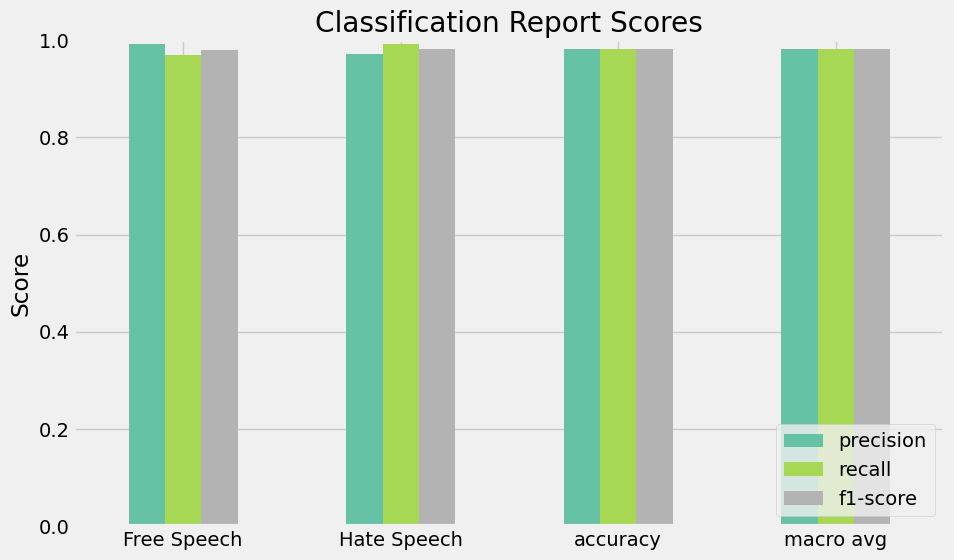

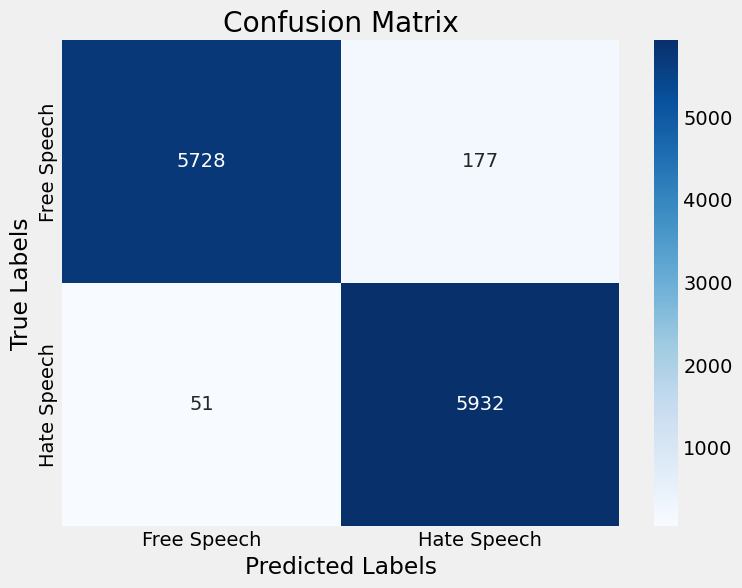

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)
        
        outputs = model(batch_input_ids, attention_mask=batch_input_mask)
        logits = outputs.logits
        predictions.append(logits.argmax(dim=1).cpu().numpy())
        true_labels.append(batch_labels.cpu().numpy())

# Flatten predictions and true labels
predictions = [item for sublist in predictions for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]

# Calculate accuracy and print classification report
print("Accuracy:", accuracy_score(true_labels, predictions))
report = classification_report(true_labels, predictions, target_names=['Free Speech', 'Hate Speech'], output_dict=True)

# Convert classification report to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the classification report scores
plt.figure(figsize=(10,6))
df_report[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10,6), cmap='Set2')
plt.title('Classification Report Scores')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Free Speech', 'Hate Speech'], 
            yticklabels=['Free Speech', 'Hate Speech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt

# Assume these variables already exist:
# model, optimizer, loss_fn, train_dataloader, val_dataloader, device

num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    total_train_loss, total_train_correct = 0, 0
    total_train_samples = 0

    for batch in train_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(batch_input_ids, attention_mask=batch_input_mask)
        logits = outputs.logits
        loss = loss_fn(logits, batch_labels)
        loss.backward()
        optimizer.step()

        # Calculate training loss and accuracy
        total_train_loss += loss.item()
        predictions = logits.argmax(dim=1)
        total_train_correct += (predictions == batch_labels).sum().item()
        total_train_samples += batch_labels.size(0)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_accuracy = total_train_correct / total_train_samples

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    total_val_loss, total_val_correct = 0, 0
    total_val_samples = 0

    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_input_mask = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_input_mask)
            logits = outputs.logits
            loss = loss_fn(logits, batch_labels)

            total_val_loss += loss.item()
            predictions = logits.argmax(dim=1)
            total_val_correct += (predictions == batch_labels).sum().item()
            total_val_samples += batch_labels.size(0)

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_accuracy = total_val_correct / total_val_samples

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, '
          f'Val Loss: {avg_val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')


In [87]:
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [88]:


predictions = []

# No gradient calculations during inference
with torch.no_grad():
    for batch in test_dataloader:
        # Move inputs to the appropriate device
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        
        # Forward pass
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        
        # Get the predicted class (e.g., 0 for non-hate speech, 1 for hate speech)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        
        # Store predictions
        predictions.extend(preds)

# Example: Print or save the predictions
print(predictions)


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [89]:
import pandas as pd

# Create a DataFrame with predictions
pred_df = pd.DataFrame({'text': df_test['tweet'], 'prediction': predictions})

# Save to a CSV file
pred_df.to_csv('test_predictions.csv', index=False)


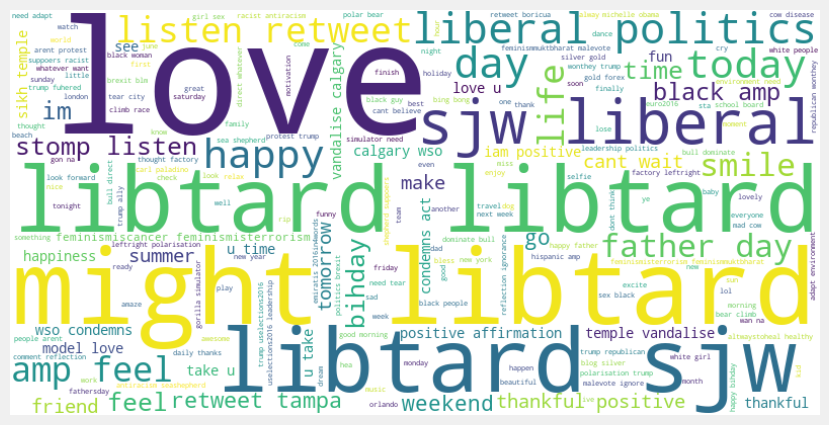

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example: Combine all text from your DataFrame's 'clean_text' column
all_text = ' '.join(text for text in balanced_data['tweet'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()
